In [1]:
from datetime import datetime, timedelta
from strategy.stratfact import StratFact
from backtester.backtester import Backtester
from portfolio.equity_portfolio import EquityPortfolio
from processor.processor import Processor as p
from tqdm import tqdm
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
start = datetime(2016,1,1)
end = datetime(2022,1,1)
seats = 10

In [3]:
# port = EquityPortfolio(start,end,"portfolio",strats = {"rolling_percent":{"modeling_params":{"days":100,"currency":"prices"},
#                         "trading_params":{"requirement":5,"value":True}},
# "progress_report":{"modeling_params":{}
#                    ,"trading_params":{"value":True,"requirement":5}},
# "financial_predict":{"modeling_params":{"score_requirement":70,"categories":4,"model_training_year":4},
#                     "trading_params":{"requirement":10,"value":True}},
# "speculation":{"modeling_params":{"number_of_training_weeks":14,"categories":4
#                                   ,"model_training_year":1,"score_requirement":70},
#                "trading_params":{"score_requirement":70,"requirement":5,"value":True}},
# "competition":{"modeling_params":{"categories":4,"model_training_year":1,"score_requirement":70},
#                 "trading_params":{"score_requirement":70,"requirement":5,"value":True}}})

In [4]:
port = EquityPortfolio(start,end,"industry_price_portfolio",strats = 
{"rolling_percent":{"modeling_params":{"days":100,"currency":"prices"},
                        "trading_params":{"requirement":5,"value":True}},
"progress_report":{"modeling_params":{}
                   ,"trading_params":{"value":True,"requirement":5}},
"financial_predict":{"modeling_params":{"score_requirement":70,"categories":3,"model_training_year":4},
                    "trading_params":{"requirement":10,"value":True}},
"speculation":{"modeling_params":{"number_of_training_weeks":14,"categories":3
                                  ,"model_training_year":4,"score_requirement":70},
               "trading_params":{"score_requirement":70,"requirement":5,"value":True}},
"competition":{"modeling_params":{"categories":3,"model_training_year":4,"score_requirement":70},
                "trading_params":{"score_requirement":70,"requirement":5,"value":True}}})

In [5]:
port.load()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:52<00:00, 10.58s/it]


In [5]:
port.transform()

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.21s/it]


In [ ]:
port.sim()

speculation_sim_year:   0%|                                                                                | 0/7 [00:00<?, ?it/s]

200Communication Services list index out of range
200Communication Services list index out of range



speculation_sim_year:  29%|███████████████████▍                                                | 2/7 [43:17<1:48:13, 1298.68s/it]

In [ ]:
port.strats["rolling_percent"]

In [6]:
trades = port.backtest()

backtesting_seats: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:26<00:00, 50.64s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [22:44<00:00, 272.93s/it]


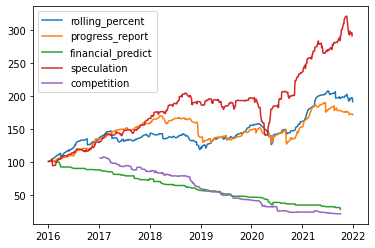

In [7]:
at = trades
strats = trades["strategy"].unique()
all_analysis = []
for strat in strats:
    strat_trades = at[at["strategy"]==strat]
    cash = []
    stuff = []
    total_cash = 100
    number_of_strats=1
    for seat in range(seats):
        initial = float(total_cash / number_of_strats / seats )
        seat_trades = strat_trades[strat_trades["seat"]==seat]
        for delta in seat_trades["delta"]:
            initial = initial * (1+delta)
            cash.append(initial)
    strat_trades["pv"] = cash
    stuff.append(strat_trades)
    analysis = pd.concat(stuff).pivot_table(index=["sell_date"],columns="seat",values="pv").fillna(method="ffill").fillna(float(total_cash / number_of_strats / seats )).reset_index()
    analysis["pv"] = [sum([row[1][i] for i in range(seats)]) for row in analysis.iterrows()]
    analysis["strategy"] = strat
    all_analysis.append(analysis)
    plt.plot(analysis["sell_date"],analysis["pv"])
plt.legend(strats)
plt.show()

In [8]:
hl = pd.concat(all_analysis)
hl

seat,sell_date,0,1,2,3,4,5,6,7,8,9,pv,strategy
0,2016-01-06,10.000000,10.000000,10.000000,10.000000,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,100.500000,rolling_percent
1,2016-01-15,10.000000,10.000000,10.500000,10.000000,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,101.000000,rolling_percent
2,2016-01-22,10.000000,10.000000,11.025000,10.000000,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,101.525000,rolling_percent
3,2016-01-26,10.000000,10.000000,11.576250,10.000000,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,102.076250,rolling_percent
4,2016-01-28,10.000000,10.000000,12.155063,10.000000,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,102.655062,rolling_percent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2021-09-22,1.007991,2.560225,0.283735,2.458781,2.078266,1.439666,1.876724,4.723810,3.199653,1.991560,21.620411,competition
490,2021-09-23,1.007991,2.560225,0.283735,2.458781,2.078266,1.439666,1.876724,4.723810,3.199653,1.991560,21.620411,competition
491,2021-09-27,1.007991,2.560225,0.283735,2.458781,2.078266,1.439666,1.876724,4.723810,3.199653,1.991560,21.620411,competition
492,2021-09-29,1.007991,2.560225,0.283735,2.458781,2.078266,1.439666,1.876724,4.723810,3.199653,1.991560,21.620411,competition
